<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Ensemble Learning. </center></h2>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Bias-Variance Decomposition

Consider regression task with MSE error metric. Suppose the following true relationship: 

$$ 
y(x) = f(x) + \epsilon 
$$ 

where $ \epsilon $ is gaussian white noise, $\epsilon \sim \mathcal{N}(0,\sigma^2) $. Denote the regression model predictions as $ a(x) = \hat{y} $. Then, for the error expected value we have:

\begin{equation}
\begin{split}
Error & = \mathbb{E}_{X,Y,\epsilon}\left[(a(x) - y(x))^2\right] = \\
      & = \mathbb{E}_{X,Y}\left[(a(x) - \mathbb{E}_{X,Y}[a(x)])^2\right]  + \left(\mathbb{E}_{X,Y}\left[a(x)\right] - f(x)\right)^2 +  \sigma^2 = \\ & = \text{Variance} + \text{Bias}^2  + \text{Noise}
\end{split}
\end{equation}

Those components can be interpreted as
* $\text{Variance}$ (Разброс) - model's sensivity to dataset. High variance usually means that model is overfitted.
* $\text{Bias}$ (Смещение) - is in charge of model's precision. High bias usually means that model is underfitted.
* $\text{Noise}$ (Шум) - that is just noise

## Example

Consider an example of a regression task with kNN regression model.

### One model

In [2]:
# Define target function for regression
def f(x):
    return np.sin(x)

Generate train and test samples

In [3]:
# Define noise level
sigma = 0.2

# Generate train sample
X_train = np.random.random(size=5) * 2 * np.pi
y_train = f(X_train) + np.random.normal(loc=0., scale=sigma, size=len(X_train))

# Generate test smaple
X_test = np.linspace(0, 2*np.pi, 1000)
y_test = f(X_test) + np.random.normal(loc=0., scale=sigma, size=len(X_test))

Fit a regression model

In [4]:
from sklearn.neighbors import KNeighborsRegressor

# Create a model
reg = KNeighborsRegressor(n_neighbors=1)

# Fit the model
reg.fit(X_train.reshape(-1, 1), y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

Make prediction on test sample

In [5]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_test_predict = reg.predict(X_test.reshape(-1, 1))

Plot predictions

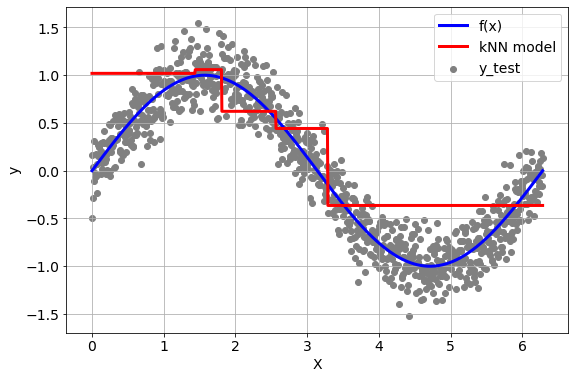

In [6]:
plt.figure(figsize=(9, 6))

plt.plot(X_test, f(X_test), label='f(x)', color='b', linewidth=3)
plt.plot(X_test, y_test_predict, label='kNN model', color='r', linewidth=3)
plt.scatter(X_test, y_test, label='y_test', color='0.5')

plt.xticks(size=14)
plt.xlabel("X", size=14)
plt.yticks(size=14)
plt.ylabel("y", size=14)
plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

Plot prediction errors

In [7]:
errors = (y_test_predict - y_test)**2

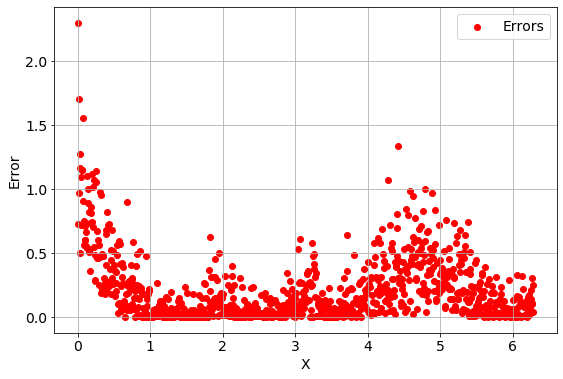

In [8]:
plt.figure(figsize=(9, 6))

plt.scatter(X_test, errors, label='Errors', color='r')

plt.xticks(size=14)
plt.xlabel("X", size=14)
plt.yticks(size=14)
plt.ylabel("Error", size=14)
plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

## Several models

Train Several Models on Random Train Samples

In [9]:
# Define noise level
sigma = 0.2

# Generate train sample
X_train = np.random.random(size=5) * 2 * np.pi
y_train = f(X_train) + np.random.normal(loc=0., scale=sigma, size=len(X_train))

# Generate test smaple
X_test = np.linspace(0, 2*np.pi, 1000)
y_test = f(X_test) + np.random.normal(loc=0., scale=sigma, size=len(X_test))

In [10]:
N_iter = 1000
predictions = []
errors = []

for i in range(N_iter):
    
    # Generate random train sample
    X_train = np.random.random(size=5) * 2 * np.pi
    y_train = f(X_train) + np.random.normal(loc=0., scale=sigma, size=len(X_train))
    
    # Create a model
    reg = KNeighborsRegressor(n_neighbors=1)
    
    # Fit the model
    reg.fit(X_train.reshape(-1, 1), y_train)
    
    # Make predictions
    y_test_predict = reg.predict(X_test.reshape(-1, 1))
    
    # Save predictions
    predictions.append(y_test_predict)
        
    # Generate random test y
    y_test_iter = f(X_test) + np.random.normal(loc=0., scale=sigma, size=len(X_test))

    # Calculate errors
    errors_iter = (y_test_predict - y_test_iter)**2

    # Save errors
    errors.append(errors_iter)
    
predictions = np.array(predictions)
errors = np.array(errors)

Estimate expected model's predictions

In [11]:
y_test_predict_mean = predictions.mean(axis=0)

Plot models 

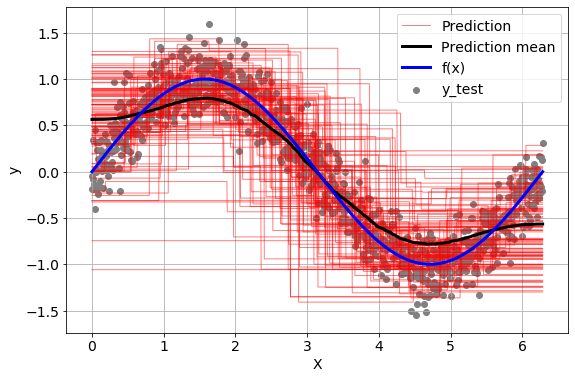

In [12]:
plt.figure(figsize=(9, 6))

for y_test_predict in predictions[:100]:
    plt.plot(X_test, y_test_predict, color='r', linewidth=1, alpha=0.5)

plt.plot(X_test, predictions[0], label='Prediction', color='r', linewidth=1, alpha=0.5)
plt.plot(X_test, y_test_predict_mean, label='Prediction mean', color='0', linewidth=3)
plt.plot(X_test, f(X_test), label='f(x)', color='b', linewidth=3)
plt.scatter(X_test, y_test, label='y_test', color='0.5')

plt.xticks(size=14)
plt.xlabel("X", size=14)
plt.yticks(size=14)
plt.ylabel("y", size=14)
plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

### Decomposition

\begin{equation}
\begin{split}
Error & = \mathbb{E}_{X,Y,\epsilon}\left[(a(x) - y(x))^2\right] = \\
      & = \mathbb{E}_{X,Y}\left[(a(x) - \mathbb{E}_{X,Y}[a(x)])^2\right]  + \left(\mathbb{E}_{X,Y}\left[a(x)\right] - f(x)\right)^2 +  \sigma^2 = \\ & = \text{Variance} + \text{Bias}^2  + \text{Noise}
\end{split}
\end{equation}

In [13]:
# Calculate expected errors
error = errors.mean(axis=0)

# Calculate varince of the model predictions
variance = predictions.std(axis=0)**2

# Calculate the model's bias
bias2 = (y_test_predict_mean - f(X_test))**2

# Calculate the noise variance
noise = sigma**2

composition = variance + bias2 + noise

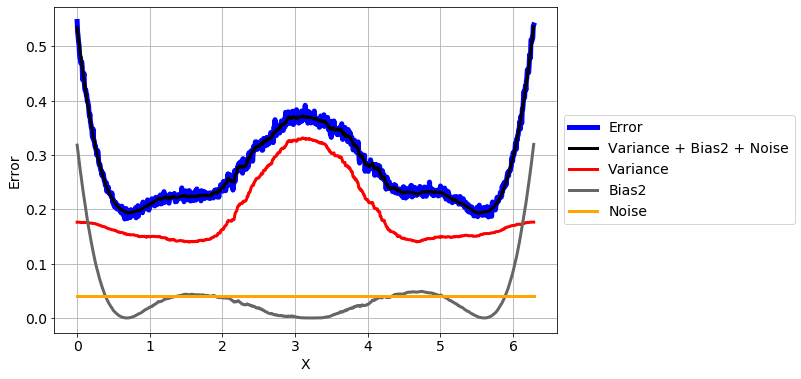

In [14]:
plt.figure(figsize=(9, 6))

plt.plot(X_test, error, label='Error', color='b', linewidth=5)
plt.plot(X_test, composition, label='Variance + Bias2 + Noise', color='0', linewidth=3)
plt.plot(X_test, variance, label='Variance', color='r', linewidth=3)
plt.plot(X_test, bias2, label='Bias2', color='0.4', linewidth=3)
plt.plot(X_test, [noise]*len(X_test), label='Noise', color='orange', linewidth=3)

plt.xticks(size=14)
plt.xlabel("X", size=14)
plt.yticks(size=14)
plt.ylabel("Error", size=14)
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(b=1)
plt.show()

# 2. Bagging

## Data Generation

In [15]:
from sklearn.datasets import make_moons, load_iris # import function from the library

N = 1000

X, y = make_moons(n_samples=N, noise=0.3, random_state=11) # generate data sample

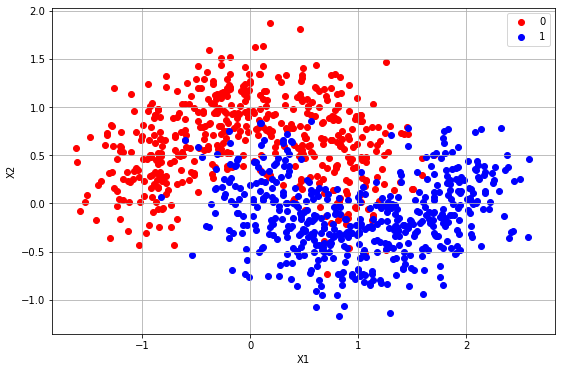

In [16]:
# Create an figure with a custom size
plt.figure(figsize=(9, 6))

# Plot all objects with y == 0 (class 0)
plt.scatter(X[y == 0, 0],     # selects all objects with y == 0 and the 1st column of X
            X[y == 0, 1],     # selects all objects with y == 0 and the 2nd column of X
            color='r',        # points color
            label='0')        # label for the plot legend


# Plot all objects with y == 1 (class 1)
plt.scatter(X[y == 1, 0],     # selects all objects with y == 1 and the 1st column of X
            X[y == 1, 1],     # selects all objects with y == 1 and the 2nd column of X
            color='b',        # points color
            label='1')        # label for the plot legend

plt.xlabel('X1') # set up X-axis label
plt.ylabel('X2') # set up Y-axis label

plt.legend(loc='best') # create the plot legend and set up it position
plt.grid(b=1) # create grid on the plot

plt.show() # display the plot

## Train / Test Split

In [17]:
# import train_test_split function to split the sample
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5,    
                                                    random_state=123) 

## Bagging Idea

<center><img src='img/ensembles.png'></center>

In [18]:
class BaggingClassifier(object):
    
    def __init__(self, base_classifiers, max_samples=1.0):
        """
        This is simple bagging classifier.
        
        Parameters
        ----------
        base_classifiers : list
            List of base classifiers.
        max_samples : float
            Fraction of samples to use for a classifier training.
        """
        
        self.base_classifiers = base_classifiers
        self.max_samples = max_samples
        
    def fit(self, X, y):
        """
        Fit the classifier.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        y : numpy.array, shape = (n_objects)
            1D array with the object labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        # Fit each classifier
        for i_clf in range(len(self.base_classifiers)):
            
            # Generate random indeces for a train subsample
            subsample_indeces = np.random.choice(a=range(len(X)), 
                                                 size=int(self.max_samples*len(X)), 
                                                 replace=True)
            # Create train subsample
            X_sub = X[subsample_indeces]
            y_sub = y[subsample_indeces]

            # Train a classifier
            self.base_classifiers[i_clf].fit(X_sub, y_sub)
            
            
    def predict_proba(self, X):
        """
        This methods performs proba bilities prediction for new objects.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
            
        Returns
        -------
        y_probas : numpy.array, shape = (n_objects, n_classes)
            Array with predicted probabilities. 
        """
        
        classifier_probas = []
        
        # For each base classifier
        for i_clf in range(len(self.base_classifiers)):
            
            try:
                # Try to predict probabilities
                proba = self.base_classifiers[i_clf].predict_proba(X)
            except:
                continue
            # Save the probabilities
            classifier_probas.append(proba)
        
        # Convert to numpy.array
        classifier_probas = np.array(classifier_probas)
        
        # Return mean probabilities
        return classifier_probas.mean(axis=1)
    
    
    def predict(self, X):
        """
        This methods performs labels prediction for new objects.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
            
        Returns
        -------
        y_predicted : numpy.array, shape = (n_objects)
            1D array with predicted labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        classifier_predictions = []
        
        # For each base classifier
        for i_clf in range(len(self.base_classifiers)):
            
            # Predict class labels
            prediction = self.base_classifiers[i_clf].predict(X)
            
            # Save class labels
            classifier_predictions.append(prediction)
            
        # Convert to numpy.array
        classifier_predictions = np.array(classifier_predictions)
        
        # Estimate class labels
        prediction = 1. * (classifier_predictions.mean(axis=0) >= 0.5)
        
        return prediction

## Fit bagging classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

clf1 = DecisionTreeClassifier(max_depth=None)
clf2 = KNeighborsClassifier(n_neighbors=1)
clf3 = LogisticRegression(C=1.0)
clf4 = SVC(kernel='rbf', gamma='scale')
clf5 = SVC(kernel='poly', degree=3, gamma='scale')

base_classifiers = [clf1, clf2, clf3, clf4, clf5]

# base_classifiers = []
# for i in range(100):
#     clf = DecisionTreeClassifier(max_depth=None)
#     base_classifiers.append(clf)

In [20]:
bagging = BaggingClassifier(base_classifiers=base_classifiers, max_samples=1.0)
bagging.fit(X_train, y_train)

/Users/mihailh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Plot decision boundaries

In [21]:
def plot_decision_boundary(clf):

    # Plot all objects with y == 0 (class 0)
    plt.scatter(X_test[y_test == 0, 0],     # selects all objects with y == 0 and the 1st column of X
                X_test[y_test == 0, 1],     # selects all objects with y == 0 and the 2nd column of X
                color='r',                  # points color
                label='0')                  # label for the plot legend


    # Plot all objects with y == 1 (class 1)
    plt.scatter(X_test[y_test == 1, 0],     # selects all objects with y == 1 and the 1st column of X
                X_test[y_test == 1, 1],     # selects all objects with y == 1 and the 2nd column of X
                color='b',                  # points color
                label='1')                  # label for the plot legend


    ### THIS IS JUST MAGIC :)

    # plot decision boundary
    h=0.1
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.6, levels=1)

    ### THE END OF THE MAGIC


    plt.xlabel('X1') # set up X-axis label
    plt.ylabel('X2') # set up Y-axis label

    plt.legend(loc='best') # create the plot legend and set up it position
    plt.grid(b=1) # create grid on the plot

Text(0.5, 1.0, 'Bagging')

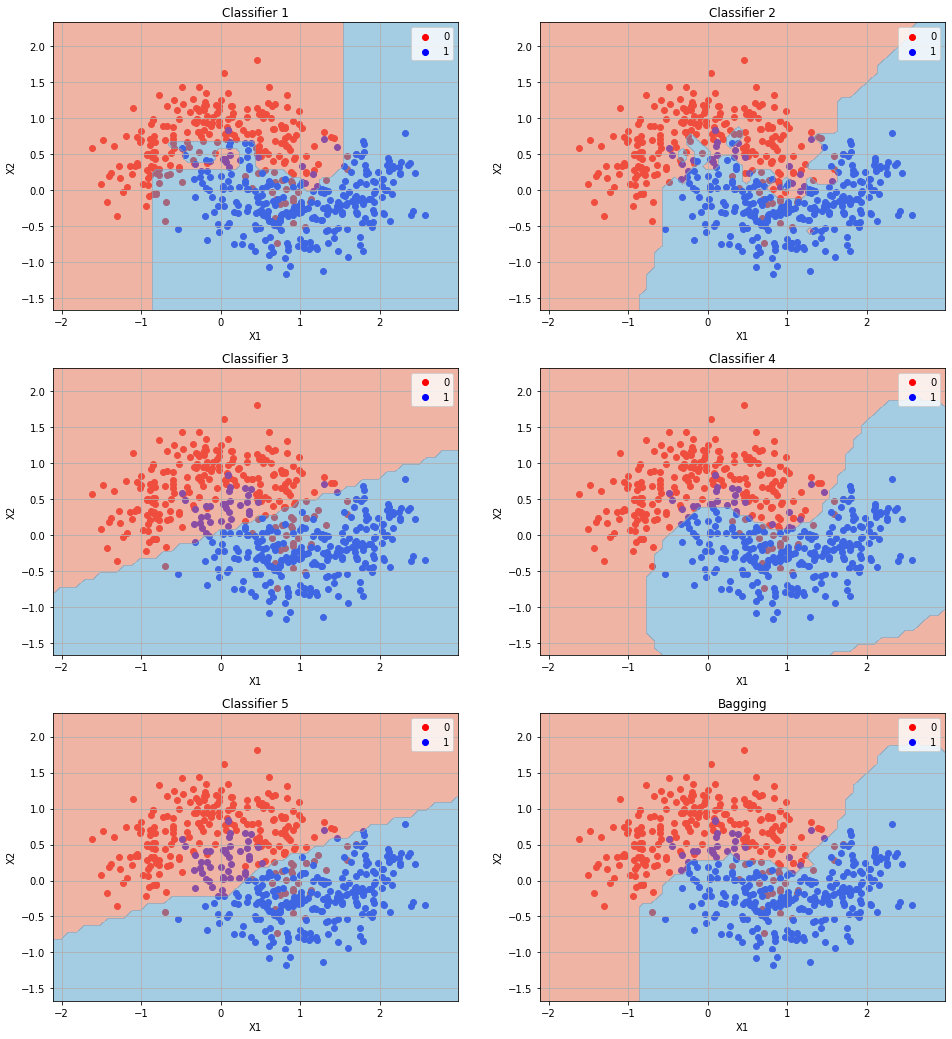

In [22]:
plt.figure(figsize=(16, 18))

plt.subplot(3, 2, 1)
plot_decision_boundary(bagging.base_classifiers[0])
plt.title('Classifier 1')

plt.subplot(3, 2, 2)
plot_decision_boundary(bagging.base_classifiers[1])
plt.title('Classifier 2')

plt.subplot(3, 2, 3)
plot_decision_boundary(bagging.base_classifiers[2])
plt.title('Classifier 3')

plt.subplot(3, 2, 4)
plot_decision_boundary(bagging.base_classifiers[3])
plt.title('Classifier 4')

plt.subplot(3, 2, 5)
plot_decision_boundary(bagging.base_classifiers[4])
plt.title('Classifier 5')

plt.subplot(3, 2, 6)
plot_decision_boundary(bagging)
plt.title('Bagging')

In [23]:
from sklearn.metrics import accuracy_score

print("Accuracy Values")

y_test_predict = bagging.base_classifiers[0].predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Classifier 1: ", accuracy)

y_test_predict = bagging.base_classifiers[1].predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Classifier 2: ", accuracy)

y_test_predict = bagging.base_classifiers[2].predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Classifier 3: ", accuracy)

y_test_predict = bagging.base_classifiers[3].predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Classifier 4: ", accuracy)

y_test_predict = bagging.base_classifiers[4].predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Classifier 5: ", accuracy)

y_test_predict = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Bagging: ", accuracy)

Accuracy Values
Classifier 1:  0.858
Classifier 2:  0.882
Classifier 3:  0.868
Classifier 4:  0.902
Classifier 5:  0.844
Bagging:  0.886


# 3. Blending

<center><img src='img/blending.png' width=900></center>

[Alexander Dyakonov (c)](https://alexanderdyakonov.wordpress.com/)

In [24]:
class BlendingClassifier(object):
    
    def __init__(self, base_classifiers, meta_classifier):
        """
        This is simple bagging classifier.
        
        Parameters
        ----------
        base_classifiers : list
            List of base classifiers.
        """
        
        self.base_classifiers = base_classifiers
        self.meta_classifier = meta_classifier
        
    def fit(self, X, y):
        """
        Fit the classifier.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        y : numpy.array, shape = (n_objects)
            1D array with the object labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        X_train, X_meta, y_train, y_meta = train_test_split(X, y, 
                                                              test_size=0.5,    
                                                              random_state=123) 
        meta_predictions = []
        
        # Fit each classifier
        for i_clf in range(len(self.base_classifiers)):

            # Train a classifier
            self.base_classifiers[i_clf].fit(X_train, y_train)
            
            # Get prediciton on meat sample
            y_meta_predict = self.base_classifiers[i_clf].predict(X_meta)
            
            # Save predictions
            meta_predictions.append(y_meta_predict)
            
        # Convert to numpy.array
        meta_predictions = np.array(meta_predictions).T
        
        # Fit meta classifier
        self.meta_classifier.fit(meta_predictions, y_meta)
            
    
    def predict(self, X):
        """
        This methods performs labels prediction for new objects.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
            
        Returns
        -------
        y_predicted : numpy.array, shape = (n_objects)
            1D array with predicted labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        meta_predictions = []
        
        # Fit each classifier
        for i_clf in range(len(self.base_classifiers)):
            
            # Get prediciton on blending sample
            y_meta_predict = self.base_classifiers[i_clf].predict(X)
            
            # Save predictions
            meta_predictions.append(y_meta_predict)
            
        # Convert to numpy.array
        meta_predictions = np.array(meta_predictions).T
        
        # Estimate class labels
        prediction = self.meta_classifier.predict(meta_predictions)
        
        return prediction

## Fit blending classifier

In [25]:
clf1 = DecisionTreeClassifier(max_depth=None)
clf2 = KNeighborsClassifier(n_neighbors=1)
clf3 = LogisticRegression(C=1.0)
clf4 = SVC(kernel='rbf', gamma='scale')
clf5 = SVC(kernel='poly', degree=3, gamma='scale')

base_classifiers = [clf1, clf2, clf3, clf4, clf5]

meta_classifier = DecisionTreeClassifier(max_depth=None)

In [26]:
blending = BlendingClassifier(base_classifiers, meta_classifier)
blending.fit(X_train, y_train)

/Users/mihailh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Plot decision boundaries

Text(0.5, 1.0, 'Blending')

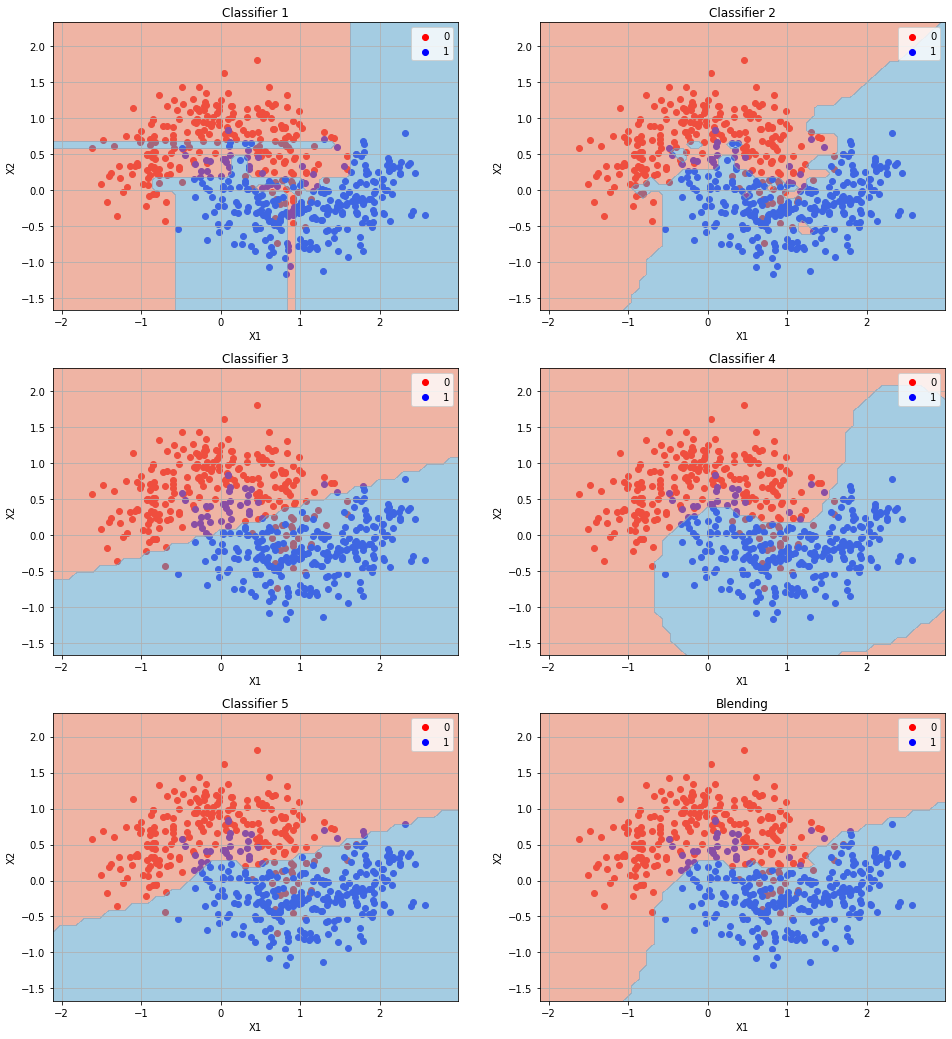

In [27]:
plt.figure(figsize=(16, 18))

plt.subplot(3, 2, 1)
plot_decision_boundary(blending.base_classifiers[0])
plt.title('Classifier 1')

plt.subplot(3, 2, 2)
plot_decision_boundary(blending.base_classifiers[1])
plt.title('Classifier 2')

plt.subplot(3, 2, 3)
plot_decision_boundary(blending.base_classifiers[2])
plt.title('Classifier 3')

plt.subplot(3, 2, 4)
plot_decision_boundary(blending.base_classifiers[3])
plt.title('Classifier 4')

plt.subplot(3, 2, 5)
plot_decision_boundary(blending.base_classifiers[4])
plt.title('Classifier 5')

plt.subplot(3, 2, 6)
plot_decision_boundary(blending)
plt.title('Blending')

In [28]:
from sklearn.metrics import accuracy_score

print("Accuracy Values")

y_test_predict = blending.base_classifiers[0].predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Classifier 1: ", accuracy)

y_test_predict = blending.base_classifiers[1].predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Classifier 2: ", accuracy)

y_test_predict = blending.base_classifiers[2].predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Classifier 3: ", accuracy)

y_test_predict = blending.base_classifiers[3].predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Classifier 4: ", accuracy)

y_test_predict = blending.base_classifiers[4].predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Classifier 5: ", accuracy)

y_test_predict = blending.predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print("Blending: ", accuracy)

Accuracy Values
Classifier 1:  0.856
Classifier 2:  0.882
Classifier 3:  0.864
Classifier 4:  0.898
Classifier 5:  0.87
Blending:  0.886
